## HYBRID ADAPTIVE APPROACH FOR PREDICTING CHRONIC KIDNEY DISEASE USING LINEAR DISCRIMINANT ANALYSIS (LDA) AND ARTIFICIAL NEURAL NETWORKS (ANN)

### Importing Required Libraries

In [56]:
# Data Handling
import numpy as np # linear algebra
import pandas as pd # data processing

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 26)



In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Understanding

In [58]:
# Importing Dataset

df = pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [60]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Data Cleaning

In [61]:
df.shape
df.drop('id', axis = 1, inplace = True)

In [62]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [63]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [65]:
# Handling Non-numeric values

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors="coerce")
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors="coerce")
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors="coerce")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [67]:
# Identifying Categorical and Non-categorical Values

num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [68]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [69]:
# Printing Unique values

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [70]:
# Replacing wrong values

df['diabetes_mellitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
df['class'].replace(to_replace="ckd\t" ,value="ckd",inplace=True)

# Verifying replacement
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [71]:
# Handling Null values

df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [72]:
# Fill not a number with random sampling
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] =random_sample

# Fill not a number with mode
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

In [73]:
# Filling nulls with random sampling

for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [74]:
# Filling nulls with mode

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

## Data Visualization

In [76]:
# Data Encoding

from sklearn.preprocessing  import LabelEncoder
encode = LabelEncoder()

for col in cat_cols:
    df[col]=encode.fit_transform(df[col])
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,133.0,4.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,131.0,18.0,0.8,144.0,3.9,11.3,38.0,6000.0,3.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,142.0,3.8,9.6,31.0,7500.0,4.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


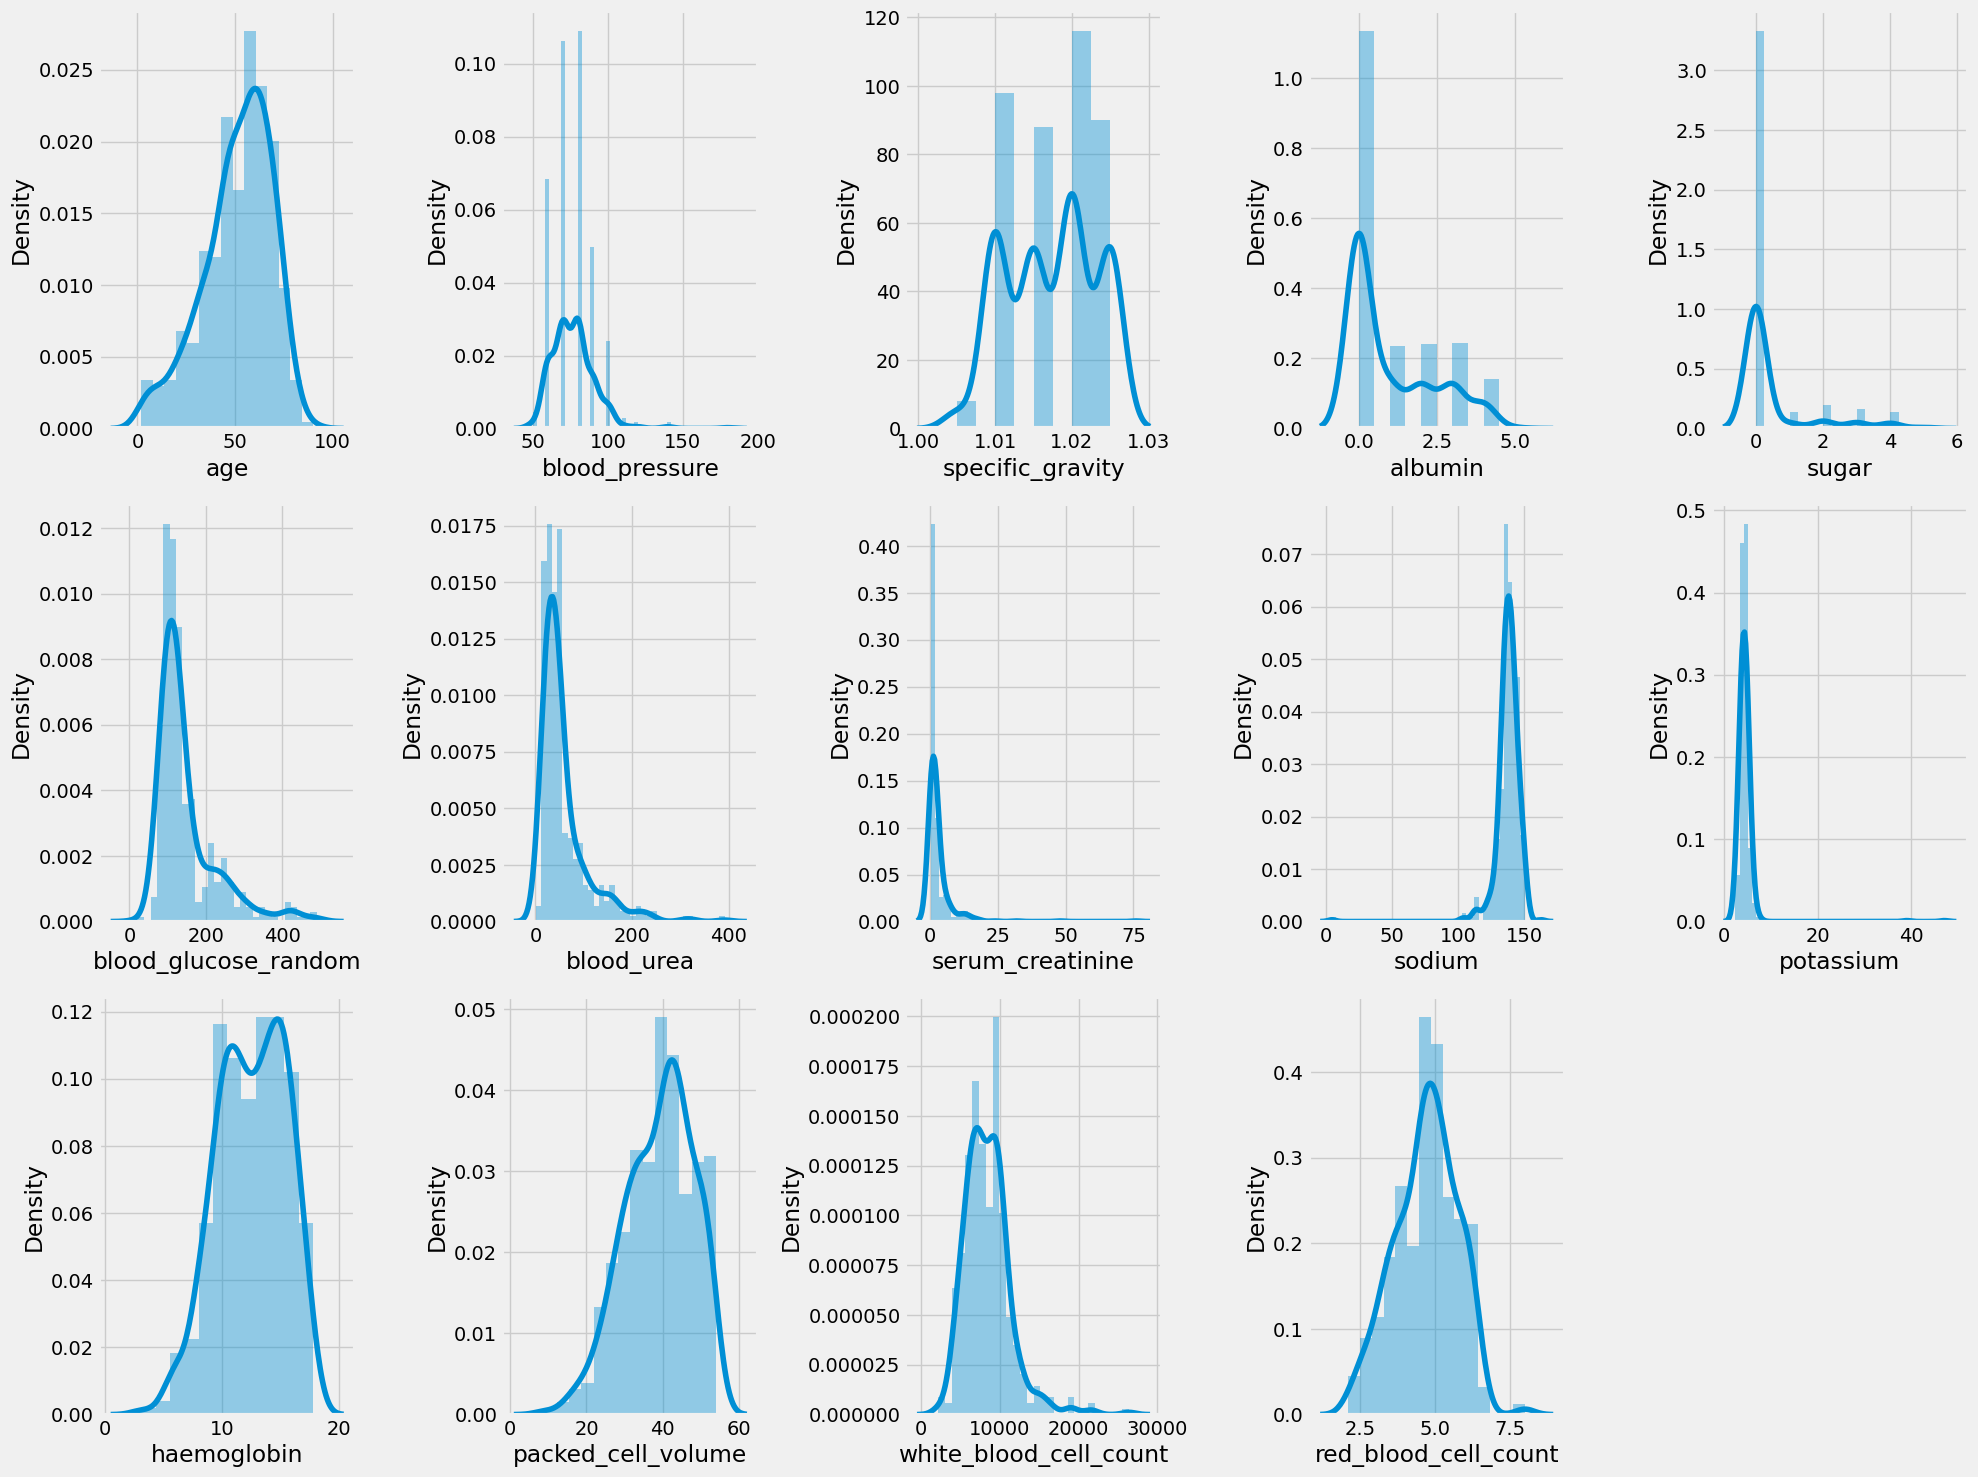

In [77]:
# Using Seaborn Distplot
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

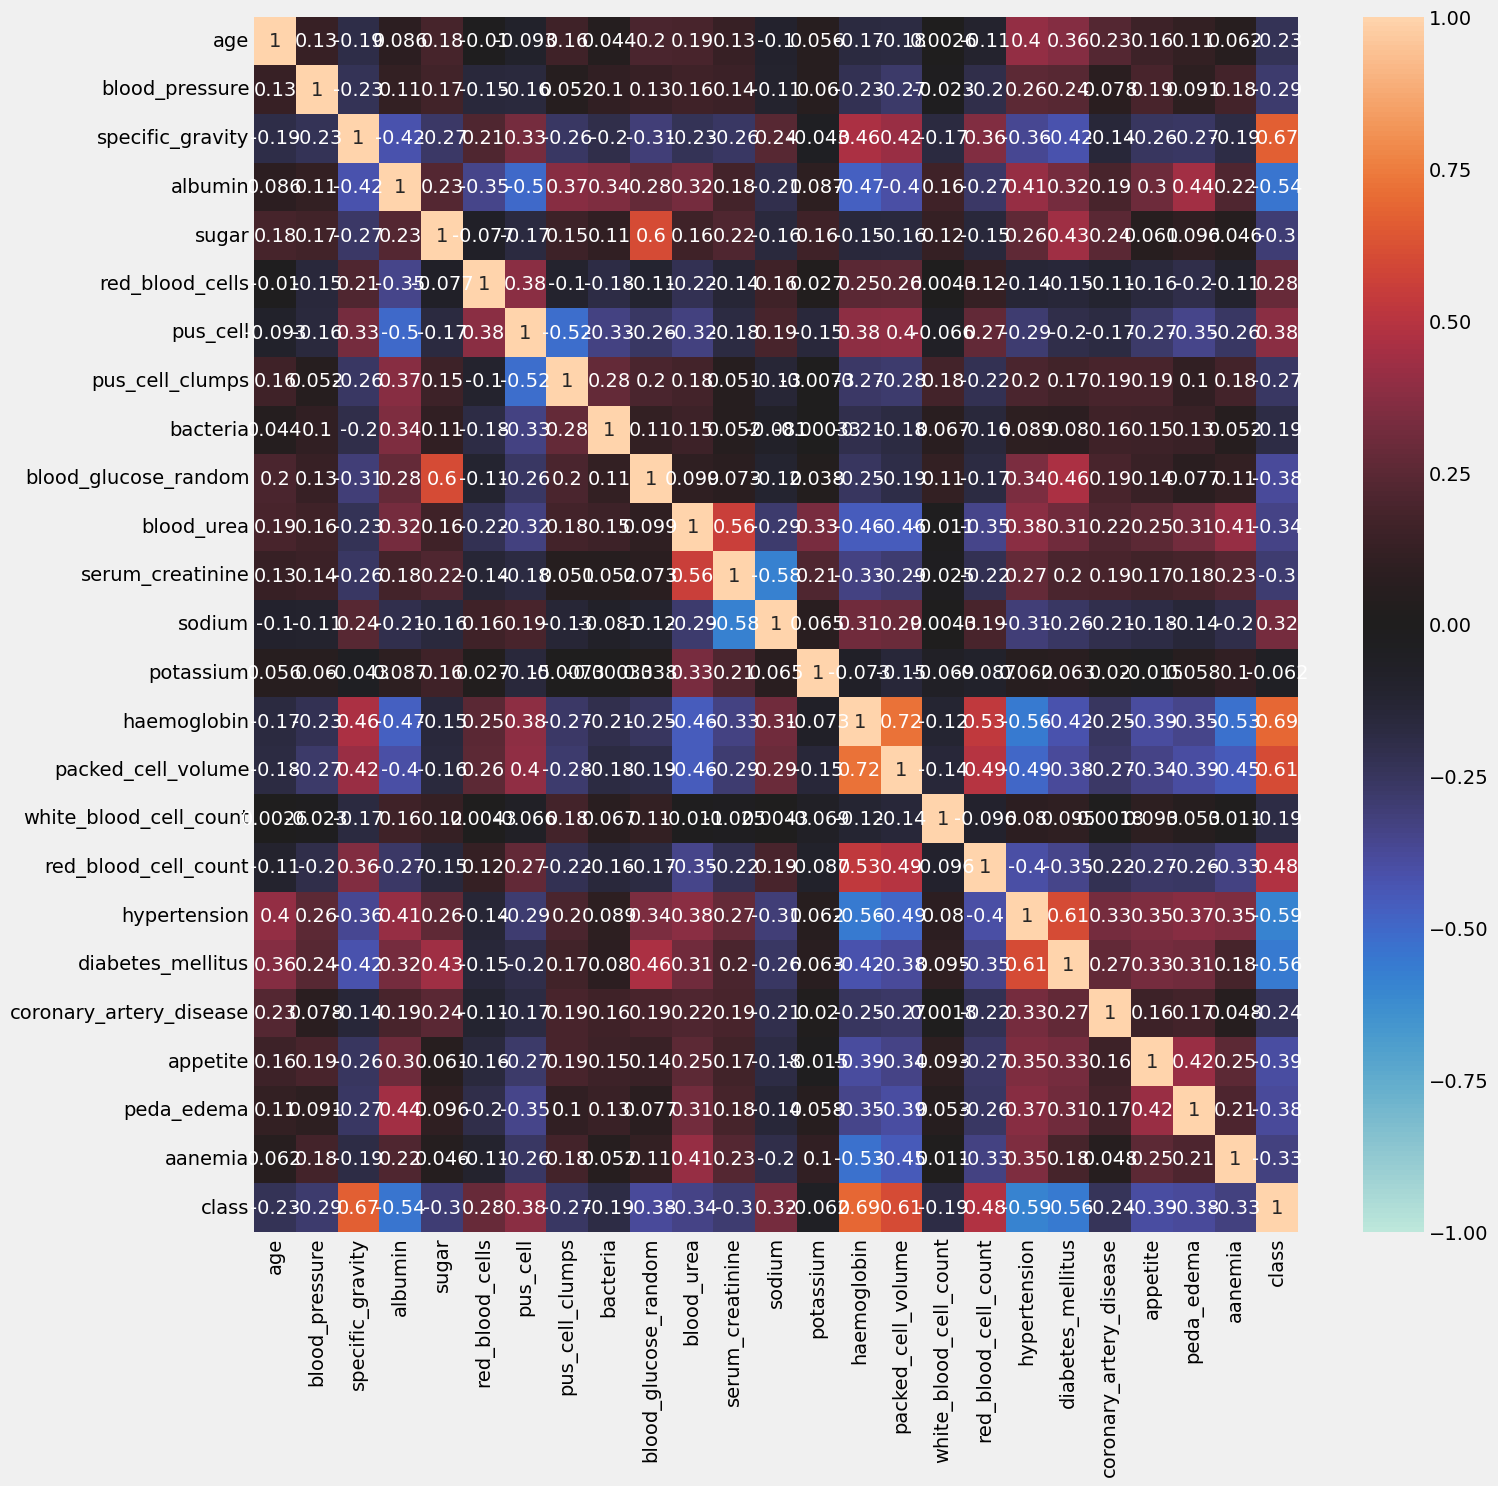

In [78]:
# Plotting Heatmap

corr = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

## Data Modeling Developmentment

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [80]:
# Data spliting
X = df.drop(columns ='class' , axis=1)
Y = df['class']

In [ ]:
# Scaling Model Parameters

sc = MinMaxScaler()

X = sc.fit_transform(X.to_numpy())

X = pd.DataFrame(X, columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
                               'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume',
                               'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia'])

In [82]:
# Feature Selection
dummy_model = ExtraTreesClassifier()
dummy_model.fit(X,Y)
print(dummy_model.feature_importances_)

[0.0068484  0.01495644 0.15475859 0.08682707 0.0115265  0.0229376
 0.02481382 0.00401575 0.00132014 0.0263659  0.01134805 0.02558451
 0.01020731 0.00684351 0.12158784 0.07622663 0.00896042 0.02787051
 0.1386238  0.11609696 0.00223008 0.04838394 0.03374522 0.01792102]


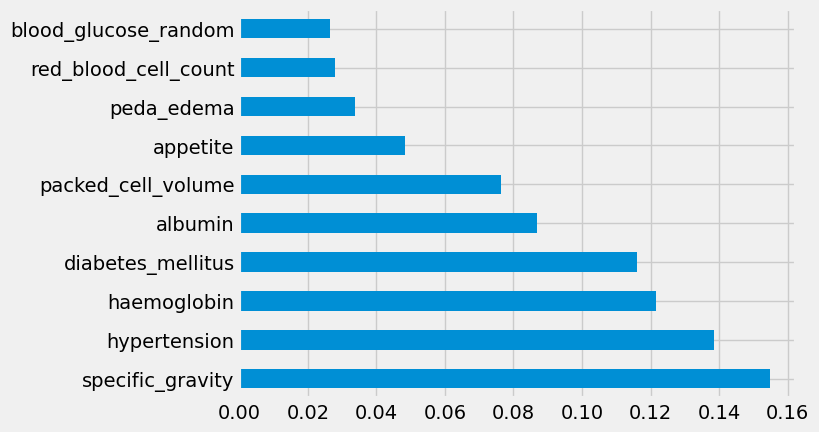

In [83]:
# 10 Best best Predictor
feat_importances = pd.Series(dummy_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [84]:
selected = ['specific_gravity', 'peda_edema', 'red_blood_cell_count', 'appetite', 'haemoglobin', 'albumin', 'packed_cell_volume', 'diabetes_mellitus', 'blood_glucose_random', 'hypertension']
unselected = list(set(X.columns) - set(selected))

X = X.drop(unselected, axis = 1)

In [85]:
# Data Spliting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [86]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (320, 10)
y train shape:  (320,)
X test shape:  (80, 10)
y test shape:  (80,)


## Buidling Trainig Model

In [87]:
import tensorflow as tf
tf.keras.backend.clear_session()

#here i build the ANN with 2 hidden layers consists of 10 and 5 neurons respectively
#the activation function that i used is relu for hidden layer and sigmoid for output layer

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X.shape[1],)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer = opt, loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training Model

In [88]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss',
                                              restore_best_weights = True,
                                              verbose = 1)

history_ann = model.fit(X_train, y_train,
                              validation_split = 0.2,
                              epochs = 50, batch_size = 32,
                              callbacks = [early_stop])

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.7063 - accuracy: 0.3672 - val_loss: 0.7091 - val_accuracy: 0.3438
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.4688 - val_loss: 0.6933 - val_accuracy: 0.5312
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6762 - accuracy: 0.6641 - val_loss: 0.6776 - val_accuracy: 0.6562
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.7656 - val_loss: 0.6624 - val_accuracy: 0.7188
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6482 - accuracy: 0.8086 - val_loss: 0.6477 - val_accuracy: 0.7656
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6356 - accuracy: 0.8477 - val_loss: 0.6336 - val_accuracy: 0.7812
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6232 - accuracy: 0.8672 - val_loss: 0.6207 - val_accuracy: 0.8281
Epoch 8/50
8/8 [================

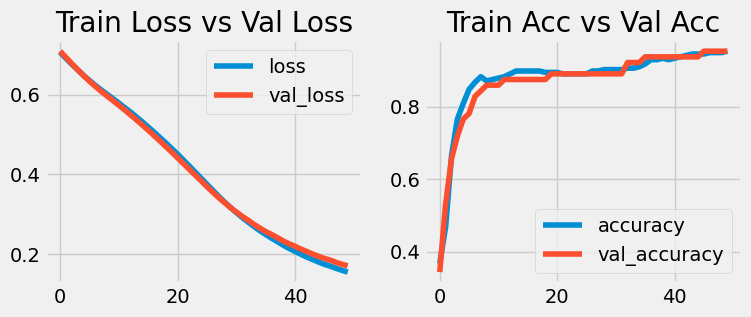

In [89]:
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
accuracy = history_ann.history['accuracy']
val_accuracy = history_ann.history['val_accuracy']
epochs = range(len(loss))

fig, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].plot(epochs, loss)
ax[0].plot(epochs, val_loss)
ax[0].legend(['loss', 'val_loss'], loc='upper right')
ax[0].set_title('Train Loss vs Val Loss')
ax[1].plot(epochs, accuracy)
ax[1].plot(epochs, val_accuracy)
ax[1].legend(['accuracy', 'val_accuracy'], loc='lower right')
ax[1].set_title('Train Acc vs Val Acc')
plt.show()

In [91]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.5 MB/s eta 0:00:00


In [92]:
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    n_hid_layers = hp.Int('n_hid_layers', 1, 2)
    for layer in range(n_hid_layers):
        n_neurons = hp.Int(f'n_neurons_{layer}', 5, 125, step = 15)
        act = hp.Choice(f'activation_{layer}',
                        ['relu', 'linear', 'sigmoid'])
        model.add(tf.keras.layers.Dense(n_neurons, activation = act))

    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

    lr = hp.Float('learning_rate', 1e-5, 1e-2)
    opt = tf.keras.optimizers.Adam(learning_rate = lr)
    model.compile(optimizer = opt, loss = 'binary_crossentropy')

    return model

In [93]:
tf.keras.backend.clear_session()

tuner = kt.BayesianOptimization(hypermodel = build_model,
                                objective = 'val_loss',
                                max_trials = 10,
                                directory = 'tuner_dir_0',
                                project_name = 'tune_model')

tuner.search_space_summary()

Search space summary
Default search space size: 4
n_hid_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
n_neurons_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 125, 'step': 15, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [94]:
tuner.search(X_train, y_train, validation_split = 0.2,
             epochs = 100, batch_size = 32)

Trial 10 Complete [00h 00m 11s]
val_loss: 0.08628523349761963

Best val_loss So Far: 0.08095147460699081
Total elapsed time: 00h 02m 11s


In [95]:
tuner.results_summary(3)

Results summary
Results in tuner_dir_0/tune_model
Showing 3 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 125
activation_0: sigmoid
learning_rate: 0.005403976534425877
n_neurons_1: 110
activation_1: relu
Score: 0.08095147460699081

Trial 03 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 65
activation_0: sigmoid
learning_rate: 0.0070037181773287115
n_neurons_1: 110
activation_1: linear
Score: 0.08144085109233856

Trial 06 summary
Hyperparameters:
n_hid_layers: 1
n_neurons_0: 50
activation_0: sigmoid
learning_rate: 0.0056423115847788596
n_neurons_1: 35
activation_1: linear
Score: 0.08180692791938782


In [96]:
# Retraining Best Model

model = build_model(tuner.get_best_hyperparameters()[0])
model.build(input_shape=(None,) + X_train.shape[1:])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 125)               1375      
                                                                 
 dense_4 (Dense)             (None, 1)                 126       
                                                                 
Total params: 1501 (5.86 KB)
Trainable params: 1501 (5.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                              restore_best_weights = True,
                                              verbose = 1)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 500, batch_size = 32, callbacks = [early_stop])

Epoch 1/500
8/8 [==============================] - 1s 25ms/step - loss: 0.6709 - val_loss: 0.6790
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5797 - val_loss: 0.5131
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 0.4987 - val_loss: 0.4466
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4337 - val_loss: 0.4043
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.3861 - val_loss: 0.3399
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.3395 - val_loss: 0.3023
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 0.3038 - val_loss: 0.2707
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2682 - val_loss: 0.2365
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2431 - val_loss: 0.2162
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2199 - val_loss: 0.1990
Epoch 11/500
8/8 [==========

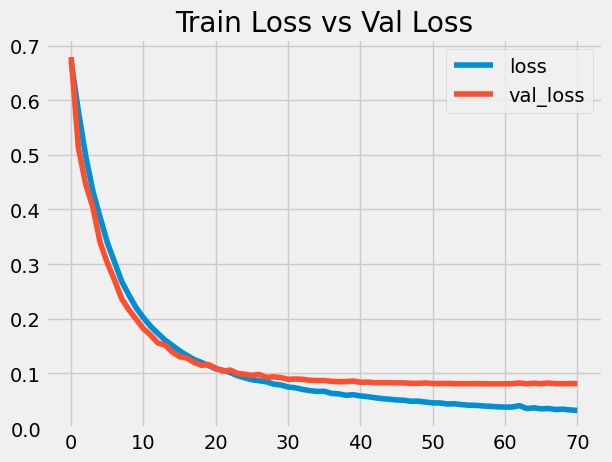

In [98]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

In [99]:
# Evaluation

model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.0456


0.045632872730493546

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



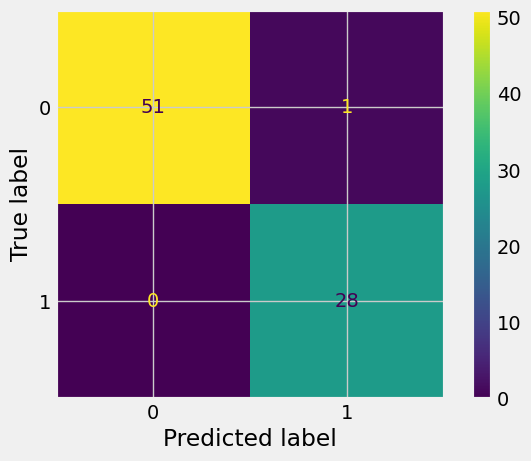

In [100]:
#predicting with model
prob = model.predict(X_test) #probability of patient has ckd
y_pred = np.round(prob)
#the probability rounded so
#y_pred = 1 means ckd and y_pred = 0 means notckd

#confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat).plot()

#classification report
print(classification_report(y_test, y_pred))

In [101]:
# Saving Model Artifcat
import joblib
joblib.dump(model,'model_CKD.pkl')

['model_CKD.pkl']

## Making Inference

In [105]:
print(X.iloc[0:1,:])

   specific_gravity  albumin  blood_glucose_random  haemoglobin  \
0              0.75      0.2              0.211538     0.836735   

   packed_cell_volume  red_blood_cell_count  hypertension  diabetes_mellitus  \
0            0.777778              0.525424           1.0                1.0   

   appetite  peda_edema  
0       0.0         0.0  


In [106]:
import joblib
import numpy as np

# Load the saved model
def load_model(model_path):
    try:
        model = joblib.load(model_path)
        return model
    except Exception as e:
        print(f"Error loading the model: {str(e)}")
        return None

# Make predictions using the loaded model
def predict(model, input_data):
    try:
        # Ensure input_data is a numpy array
        input_data = np.array(input_data)

        # Perform predictions
        predictions = model.predict(input_data)
        return predictions
    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None

if __name__ == "__main__":
    # Define the path to the saved model artifact
    model_path = 'model_CKD.pkl'

    # Load the model
    loaded_model = load_model(model_path)

    if loaded_model:
        # Define your input data for prediction (replace with your actual data)
        input_data = [
            [0.75, 0.2,  0.211538, 0.836735,
             0.777778, 0.525424, 1.0, 1.0,
             0.0, 0.0]
        ]

        # Make predictions using the loaded model
        predictions = predict(loaded_model, input_data)

        if predictions:
            print("Predictions:")
            print(predictions)

1/1 [==============================] - 0s 88ms/step
Predictions:
[[0.00010949]]
